In [1]:

#1 Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#2 For sklearn model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:

#3 Load the dataset
df = pd.read_csv("Boston.csv")
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [3]:

#4 Check for missing values
print("Missing values in each column:\n", df.isnull().sum())



Missing values in each column:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64


In [4]:
#5 Extract features and target
X = df.drop(columns=["MEDV"], axis=1)  # 'medv' is the target column (Median value of owner-occupied homes)
y = df["MEDV"]


In [5]:

#6 Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
#7 Manual Linear Regression
class myLR:
  def __init__(self):
    self.coef_= None
    self.intercept_= None

  def fit(self, X_train, y_train):
    X_train=np.insert(X_train,0,1,axis=1)

    #calculate coeficients
    #Compute beta values using Normal Equation: (X^T * X)^(-1) * X^T * y
    betas=np.linalg.inv(X_train.T@X_train)@X_train.T@y_train
    self.intercept_=betas[0]
    self.coef_=betas[1:]

  def predict(self, X_test):
    y_pred=X_test@self.coef_+self.intercept_
    return y_pred


In [7]:
lr=myLR()


In [8]:
lr.fit(X_train, y_train)

In [9]:
X_train.shape

(404, 12)

In [10]:
#8 prediction on test data
y_hat=lr.predict(X_test)
y_hat

,0
173,28.958215
274,36.287541
491,14.098836
72,25.033144
452,17.601968
...,...
412,2.857286
436,16.730515
411,19.176302
86,22.231577


In [17]:
#9 evluation matrices for manual LR
mae= mean_absolute_error(y_test,y_hat)
mse=mean_squared_error(y_test,y_hat)
rmse=np.sqrt(mean_squared_error(y_test,y_hat))

print('mae=' , mae)
print('mse=' , mse)
print('rmse=' , rmse)
r2_score(y_test,y_hat)

mae= 3.111377388238816
mse= 22.777708563865666
rmse= 4.7725997699226435


0.6893967884614811

In [12]:

#10 Create and train the model with sklearn
lr = LinearRegression()
lr.fit(X_train, y_train)

#11 Predict on test data
y_pred_sklearn = lr.predict(X_test)

#12 Evaluation metrics of sklearn model
mae_sklearn = mean_absolute_error(y_test, y_pred_sklearn)
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
rmse_sklearn = np.sqrt(mse_sklearn)
r2_sklearn = r2_score(y_test, y_pred_sklearn)

print("Sklearn Linear Regression Results:")
print(f"MAE: {mae_sklearn:.3f}")
print(f"MSE: {mse_sklearn:.3f}")
print(f"RMSE: {rmse_sklearn:.3f}")
print(f"R²: {r2_sklearn:.3f}")


Sklearn Linear Regression Results:
MAE: 3.111
MSE: 22.778
RMSE: 4.773
R²: 0.689


In [13]:

#13 Compare the two models
comparison = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R²'],
    'Manual Implementation': [mean_absolute_error(y_test,y_hat), mean_squared_error(y_test,y_hat), np.sqrt(mean_squared_error(y_test,y_hat)), r2_score(y_test,y_hat)],
    'Sklearn Implementation': [mae_sklearn, mse_sklearn, rmse_sklearn, r2_sklearn]
})

comparison


,Metric,Manual Implementation,Sklearn Implementation
0,MAE,3.111377,3.111377
1,MSE,22.777709,22.777709
2,RMSE,4.772600,4.772600
3,R²,0.689397,0.689397


In [14]:
import plotly.express as px

In [15]:
#14 3d plot of data
fig=px.scatter_3d(df, x='LSTAT', y='RM', z='MEDV' , color='CHAS')
fig.show()

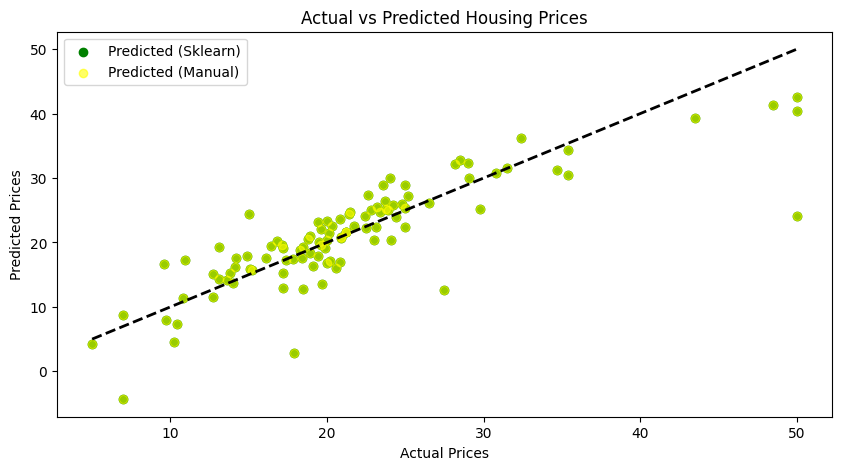

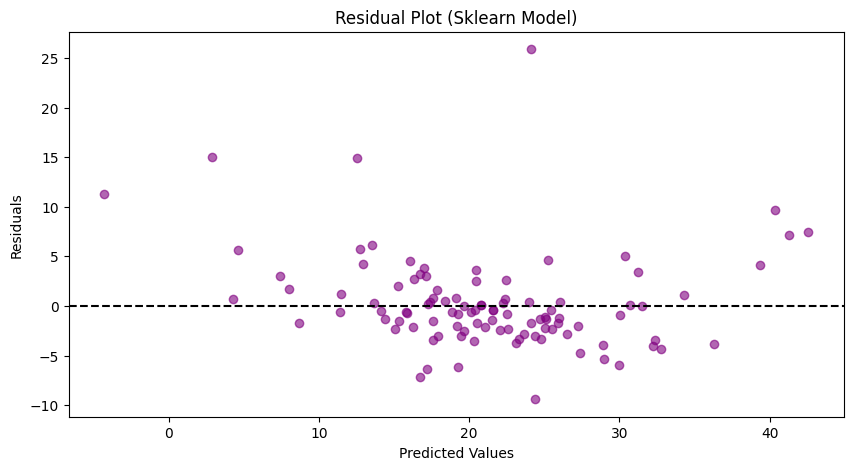

In [26]:

#15 Plot actual vs predicted values
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_sklearn, color='green', label='Predicted (Sklearn)')
plt.scatter(y_test, y_hat, color='yellow', alpha=0.6, label='Predicted (Manual)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Housing Prices")
plt.legend()
plt.show()

#16 Residual plot
residuals = y_test - y_pred_sklearn
plt.figure(figsize=(10,5))
plt.scatter(y_pred_sklearn, residuals, color='purple', alpha=0.6)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Sklearn Model)")
plt.show()
